# Conclusion

Decision tree classification with pruned parameter values found with `RandomizedSearchCV`.

PLAYER_RANKING is not used according to the feature importances.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **73% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.72|0.74|0.85|0.79|0.67|0.51|0.58|
|max_depth=249|0.73|0.75|0.86|0.80|0.69|0.51|0.59|
|reg_lambda=0.8|0.72|0.73|0.87|0.80|0.69|0.47|0.56|
|gamma=1|0.73|0.74|0.86|0.80|0.68|0.51|0.58|
|scale_pos_weight=47|0.60|0.85|0.43|0.57|0.48|0.87|0.62|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **72% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.65|0.68|0.78|0.73|0.59|0.47|0.52|
|max_depth=392|0.72|0.73|0.84|0.78|0.69|0.53|0.60|
|reg_lambda=0.8|0.66|0.68|0.79|0.73|0.60|0.46|0.52|
|gamma=355|0.60|0.60|1.00|0.75|0.00|0.00|0.00|
|scale_pos_weight=5|0.67|0.77|0.63|0.69|0.56|0.72|0.63|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **68% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.58|0.62|0.59|0.60|0.54|0.57|0.56|
|max_depth=253|0.68|0.71|0.70|0.71|0.63|0.64|0.64|
|reg_lambda=0.7|0.62|0.65|0.64|0.65|0.58|0.58|0.58|
|gamma=59|0.55|0.55|1.00|0.71|0.00|0.00|0.00|
|scale_pos_weight=3|0.64|0.74|0.54|0.62|0.57|0.76|0.65|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **60% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.61|0.64|0.64|0.64|0.58|0.58|0.58|
|max_depth=236|0.66|0.69|0.65|0.67|0.63|0.67|0.65|
|reg_lambda=0.05|0.60|0.63|0.53|0.58|0.57|0.67|0.62|
|gamma=457|0.47|0.00|0.00|0.00|0.47|1.00|0.64|
|scale_pos_weight=107|0.55|0.72|0.26|0.38|0.51|0.89|0.65|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **65% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.65|0.68|0.79|0.73|0.59|0.45|0.51|
|max_depth=140|0.69|0.71|0.83|0.76|0.67|0.49|0.57|
|reg_lambda=0.9|0.65|0.68|0.77|0.72|0.57|0.47|0.51|
|gamma=108|0.59|0.59|1.00|0.75|0.00|0.00|0.00|
|scale_pos_weight=38|0.54|0.73|0.38|0.47|0.46|0.81|0.59|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **67% accuracy**

|Pruning|Accuracy|0 Precision|0 Recall|0 f1-score|1 Precision|1 Recall|1 f1-score|
|-|-|-|-|-|-|-|-|
|None|0.64|0.67|0.77|0.71|0.59|0.46|0.52|
|max_depth=278|0.67|0.70|0.75|0.72|0.62|0.57|0.59|
|reg_lambda=0.3|0.61|0.64|0.75|0.69|0.54|0.41|0.46|
|gamma=5|0.62|0.65|0.76|0.70|0.56|0.43|0.49|
|scale_pos_weight=18|0.56|0.71|0.40|0.51|0.48|0.78|0.60|


In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [4]:
cumulative_player_stats_df = Local.get_cumulative_player_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [5]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [6]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [7]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [8]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [9]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [10]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [11]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [12]:
games_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
16157,2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0
16156,2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0
16155,2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0
16154,2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0
16153,2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0
3,2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0
2,2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0
1,2020-12-19,12000048,1610612764,1610612765,2020,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0


In [13]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,...,PPG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home
0,2003-10-05,10300001,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
1,2003-10-06,10300002,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
2,2003-10-07,10300009,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
3,2003-10-07,10300005,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
4,2003-10-07,10300007,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,2,1,111.500000,0.443500,0.353000,0.691000,...,92.000000,0.427000,0.283000,0.818000,26.000000,35.000000,1.610613e+09,1.610613e+09,0.000000,1.000000
23516,2020-12-18,12000039,1,2020,2,1,105.000000,0.438000,0.383000,0.619000,...,108.000000,0.471000,0.241000,0.750000,23.000000,42.000000,1.610613e+09,1.610613e+09,1.000000,0.000000
23517,2020-12-19,12000049,1,2020,3,3,119.333333,0.466667,0.329333,0.704667,...,111.333333,0.392667,0.332333,0.789667,24.000000,56.000000,1.610613e+09,1.610613e+09,0.333333,1.000000
23518,2020-12-19,12000048,1,2020,2,3,100.000000,0.415000,0.321500,0.704500,...,93.333333,0.413333,0.333000,0.713000,20.000000,41.666667,1.610613e+09,1.610613e+09,0.666667,0.000000


## Attach PCA of Player Stats Column

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
cumulative_stats_df.insert(len(cumulative_stats_df.columns), 'PLAYER_RANKING', np.nan)

In [17]:
for i, row in cumulative_stats_df.iterrows():
    team_player_stats = cumulative_player_stats_df[
        (cumulative_player_stats_df['GAME_ID']==row['GAME_ID'])&
        (cumulative_player_stats_df['TEAM_ID']==row['TEAM_ID_home'])&
        (cumulative_player_stats_df['GAMES_PLAYED']>0)
    ][['PPG_total','FG_PCT_total','FG3_PCT_total','SPG_total','APG_total','FT_PCT_total','BPG_total','RPG_total']].dropna()
    if len(team_player_stats)==0:
        continue
    pca_1 = PCA(n_components=1)
    reduced_team_player_stats = pd.DataFrame(pca_1.fit_transform(team_player_stats))
    cumulative_stats_df['PLAYER_RANKING'].iat[i] = reduced_team_player_stats.mean()
    if i%5000==0:
        print(i)

5000
10000
15000
20000


In [18]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,GAMES_PLAYED_away,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,...,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,TEAM_ID_away,TEAM_ID_home,W_PCT_away,W_PCT_home,PLAYER_RANKING
0,2003-10-05,10300001,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
1,2003-10-06,10300002,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
2,2003-10-07,10300009,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
3,2003-10-07,10300005,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
4,2003-10-07,10300007,1,2003,0,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,2,1,111.500000,0.443500,0.353000,0.691000,...,0.427000,0.283000,0.818000,26.000000,35.000000,1.610613e+09,1.610613e+09,0.000000,1.000000,4.934325e-16
23516,2020-12-18,12000039,1,2020,2,1,105.000000,0.438000,0.383000,0.619000,...,0.471000,0.241000,0.750000,23.000000,42.000000,1.610613e+09,1.610613e+09,1.000000,0.000000,-5.736152e-16
23517,2020-12-19,12000049,1,2020,3,3,119.333333,0.466667,0.329333,0.704667,...,0.392667,0.332333,0.789667,24.000000,56.000000,1.610613e+09,1.610613e+09,0.333333,1.000000,1.268826e-16
23518,2020-12-19,12000048,1,2020,2,3,100.000000,0.415000,0.321500,0.704500,...,0.413333,0.333000,0.713000,20.000000,41.666667,1.610613e+09,1.610613e+09,0.666667,0.000000,-5.181041e-16


## Attach target columns to dataset

In [19]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [20]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)].dropna()

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [21]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

,PPG_total_home,FG_PCT_total_home,FG3_PCT_total_home,FT_PCT_total_home,APG_total_home,RPG_total_home,PPG_total_away,FG_PCT_total_away,FG3_PCT_total_away,FT_PCT_total_away,APG_total_away,RPG_total_away,W_PCT_away,W_PCT_home,PLAYER_RANKING
114,79.000000,0.329000,0.143000,0.897000,7.000000,44.000000,86.000000,0.352000,0.222000,0.647000,15.000000,55.000000,1.000000,0.000000,8.881784e-17
117,100.000000,0.442000,0.365000,0.650000,20.500000,38.500000,62.000000,0.385000,0.300000,0.576000,11.000000,30.000000,1.000000,0.500000,1.233581e-16
118,90.000000,0.457000,0.143000,0.735000,23.000000,41.000000,104.000000,0.527000,0.429000,0.657000,22.000000,33.000000,1.000000,1.000000,-7.401487e-17
119,105.000000,0.527000,0.700000,0.714000,27.000000,39.000000,80.000000,0.350000,0.429000,0.750000,18.000000,45.000000,0.000000,1.000000,4.934325e-16
120,76.000000,0.383000,0.200000,0.750000,17.000000,39.000000,101.000000,0.464000,0.250000,0.679000,22.000000,47.000000,1.000000,1.000000,-8.074349e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,111.500000,0.443500,0.353000,0.691000,25.000000,41.500000,92.000000,0.427000,0.283000,0.818000,26.000000,35.000000,0.000000,1.000000,4.934325e-16
23516,105.000000,0.438000,0.383000,0.619000,26.000000,35.500000,108.000000,0.471000,0.241000,0.750000,23.000000,42.000000,1.000000,0.000000,-5.736152e-16
23517,119.333333,0.466667,0.329333,0.704667,30.666667,52.666667,111.333333,0.392667,0.332333,0.789667,24.000000,56.000000,0.333333,1.000000,1.268826e-16
23518,100.000000,0.415000,0.321500,0.704500,22.000000,44.500000,93.333333,0.413333,0.333000,0.713000,20.000000,41.666667,0.666667,0.000000,-5.181041e-16


## Train test split

In [22]:
from imblearn.combine import SMOTEENN

In [23]:
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    X_train_dict[key], X_test_dict[key], y_train_dict[key], y_test_dict[key] = train_test_split(
        X_over,
        y_over,
        train_size=0.8,
        random_state=0,
    )

## Do hyperparameters searches

In [24]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [25]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [26]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y)
    return clf

## Plot feature importances

In [27]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

## Train w/o pruning

In [28]:
from sklearn.metrics import classification_report

In [29]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, grid_cv_params):
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        print('Best XGBoost accuracy (%s): %.2f' % (str(cv_clf.best_params_), cv_clf.score(X_test_dict[key], y_test_dict[key])))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')

WINNER:

Best XGBoost accuracy ({}): 0.72
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       840
           1       0.67      0.51      0.58       504

    accuracy                           0.72      1344
   macro avg       0.71      0.68      0.69      1344
weighted avg       0.72      0.72      0.71      1344



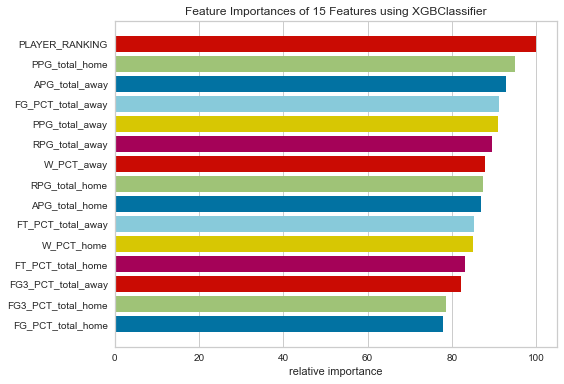

---------------------------------------------
FGP:

Best XGBoost accuracy ({}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       580
           1       0.59      0.47      0.52       395

    accuracy                           0.65       975
   macro avg       0.64      0.63      0.63       975
weighted avg       0.65      0.65      0.65       975



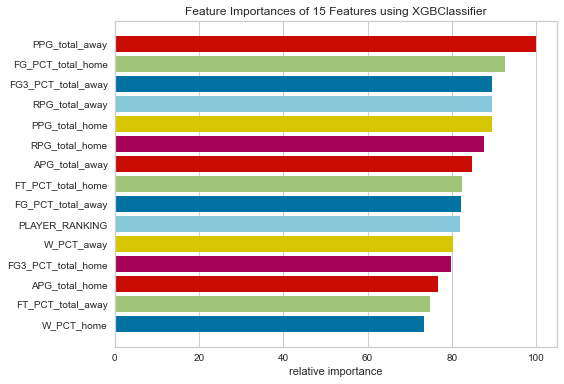

---------------------------------------------
FG3:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       340
           1       0.58      0.58      0.58       286

    accuracy                           0.61       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.61      0.61      0.61       626



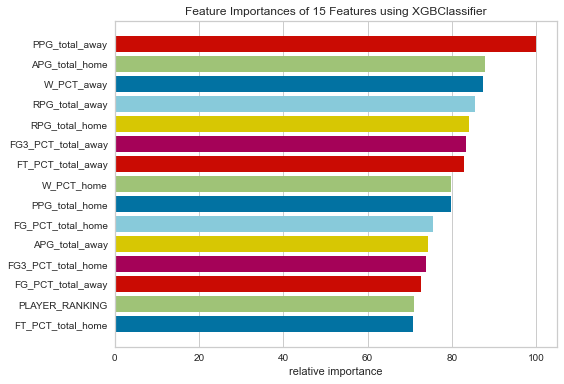

---------------------------------------------
FT:

Best XGBoost accuracy ({}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.54      0.59       326
           1       0.58      0.69      0.63       308

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.62      0.61      0.61       634



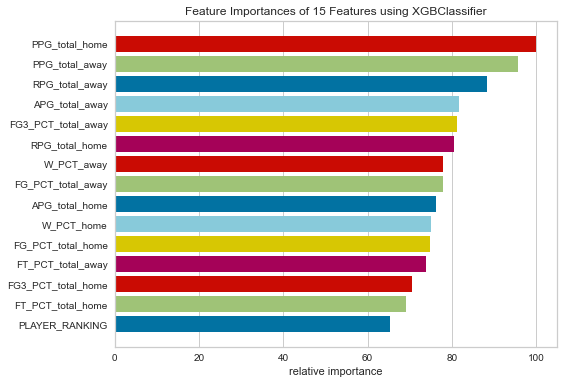

---------------------------------------------
AST:

Best XGBoost accuracy ({}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       583
           1       0.59      0.45      0.51       389

    accuracy                           0.65       972
   macro avg       0.63      0.62      0.62       972
weighted avg       0.64      0.65      0.64       972



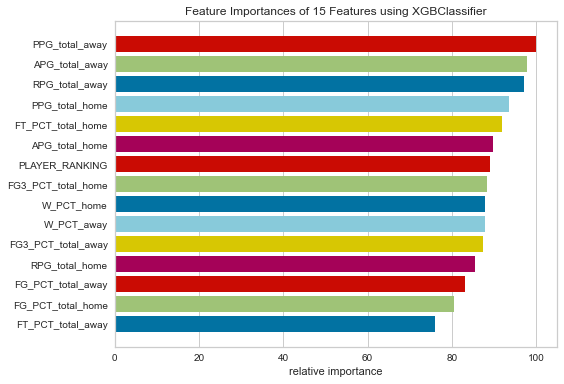

---------------------------------------------
REB:

Best XGBoost accuracy ({}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       487
           1       0.59      0.46      0.52       350

    accuracy                           0.64       837
   macro avg       0.63      0.62      0.62       837
weighted avg       0.63      0.64      0.63       837



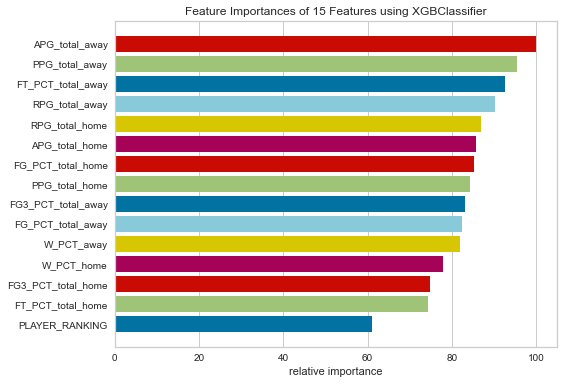

---------------------------------------------


In [30]:
print_all_metrics_and_plot(
    xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
    X_train_dict,
    X_test_dict,
    {}
)

## Try prune max depth

WINNER:

Best XGBoost accuracy ({'max_depth': 249}): 0.73
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       842
           1       0.69      0.51      0.59       506

    accuracy                           0.73      1348
   macro avg       0.72      0.69      0.69      1348
weighted avg       0.72      0.73      0.72      1348



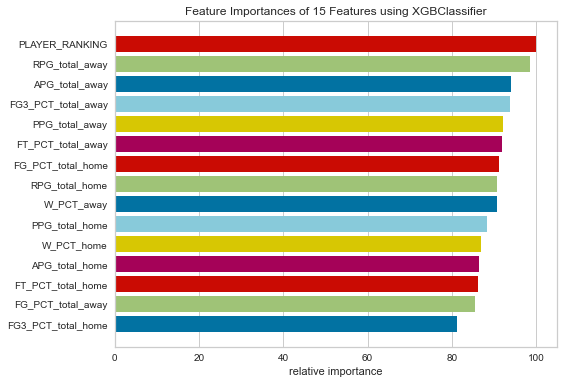

---------------------------------------------
FGP:

Best XGBoost accuracy ({'max_depth': 392}): 0.72
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       591
           1       0.69      0.53      0.60       395

    accuracy                           0.72       986
   macro avg       0.71      0.69      0.69       986
weighted avg       0.71      0.72      0.71       986



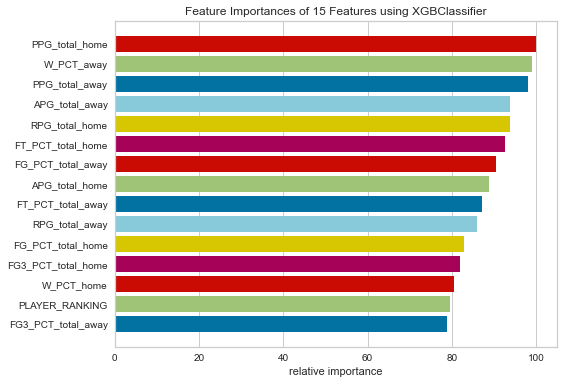

---------------------------------------------
FG3:

Best XGBoost accuracy ({'max_depth': 253}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       349
           1       0.63      0.64      0.64       280

    accuracy                           0.68       629
   macro avg       0.67      0.67      0.67       629
weighted avg       0.68      0.68      0.68       629



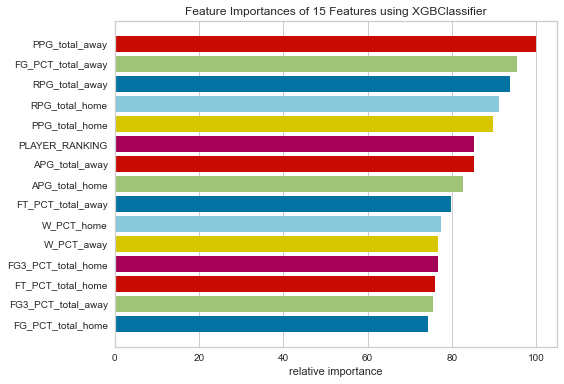

---------------------------------------------
FT:

Best XGBoost accuracy ({'max_depth': 236}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       334
           1       0.63      0.67      0.65       295

    accuracy                           0.66       629
   macro avg       0.66      0.66      0.66       629
weighted avg       0.66      0.66      0.66       629



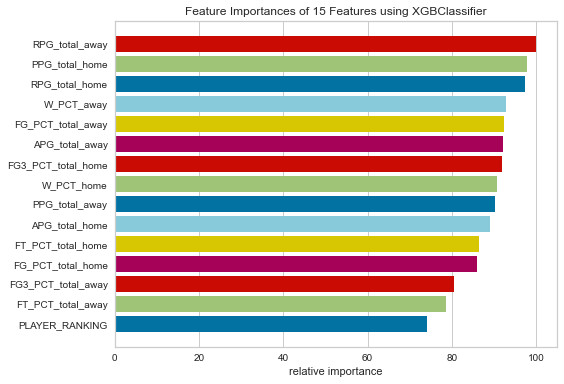

---------------------------------------------
AST:

Best XGBoost accuracy ({'max_depth': 140}): 0.69
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       582
           1       0.67      0.49      0.57       398

    accuracy                           0.69       980
   macro avg       0.69      0.66      0.66       980
weighted avg       0.69      0.69      0.68       980



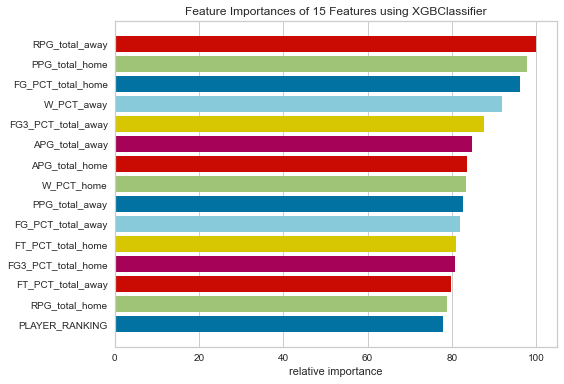

---------------------------------------------
REB:

Best XGBoost accuracy ({'max_depth': 278}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       486
           1       0.62      0.56      0.59       352

    accuracy                           0.67       838
   macro avg       0.66      0.65      0.65       838
weighted avg       0.67      0.67      0.67       838



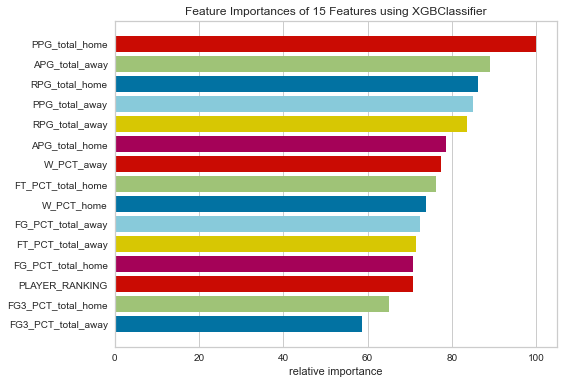

---------------------------------------------


In [30]:
print_all_metrics_and_plot(
    xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
    X_train_dict,
    X_test_dict,
    {
       'max_depth': [*range(3,500)],
    },
)

## Try prune reg_lambda

WINNER:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.72
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       840
           1       0.69      0.47      0.56       504

    accuracy                           0.72      1344
   macro avg       0.71      0.67      0.68      1344
weighted avg       0.71      0.72      0.71      1344



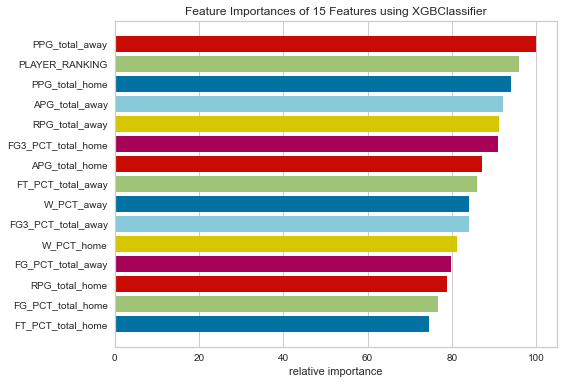

---------------------------------------------
FGP:

Best XGBoost accuracy ({'reg_lambda': 0.8}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       580
           1       0.60      0.46      0.52       395

    accuracy                           0.66       975
   macro avg       0.64      0.62      0.63       975
weighted avg       0.65      0.66      0.65       975



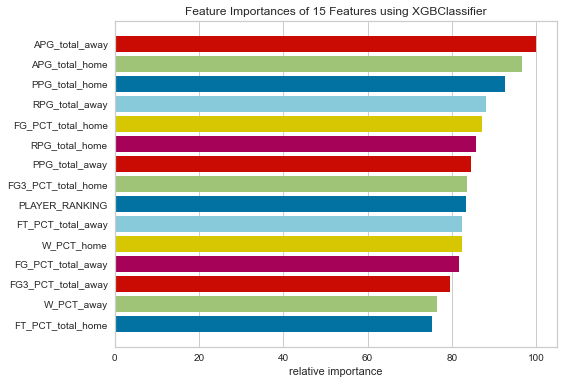

---------------------------------------------
FG3:

Best XGBoost accuracy ({'reg_lambda': 0.7}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       340
           1       0.58      0.58      0.58       286

    accuracy                           0.62       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.62      0.62      0.62       626



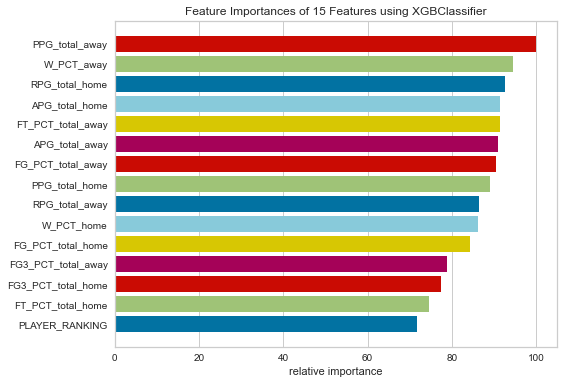

---------------------------------------------
FT:

Best XGBoost accuracy ({'reg_lambda': 0.05}): 0.60
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       326
           1       0.57      0.67      0.62       308

    accuracy                           0.60       634
   macro avg       0.60      0.60      0.60       634
weighted avg       0.60      0.60      0.60       634



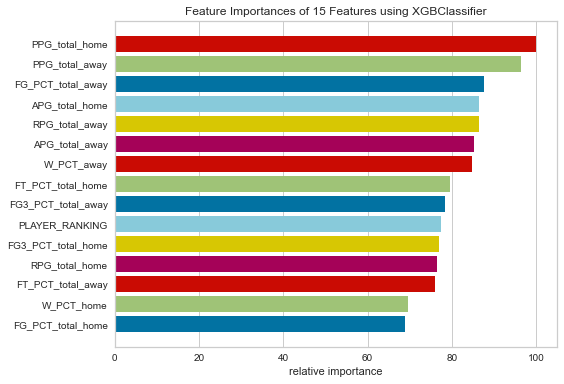

---------------------------------------------
AST:

Best XGBoost accuracy ({'reg_lambda': 0.9}): 0.65
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       583
           1       0.57      0.47      0.51       389

    accuracy                           0.65       972
   macro avg       0.63      0.62      0.62       972
weighted avg       0.64      0.65      0.64       972



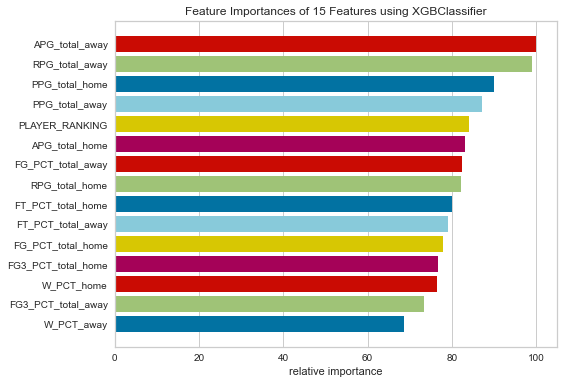

---------------------------------------------
REB:

Best XGBoost accuracy ({'reg_lambda': 0.3}): 0.61
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       487
           1       0.54      0.41      0.46       350

    accuracy                           0.61       837
   macro avg       0.59      0.58      0.58       837
weighted avg       0.60      0.61      0.60       837



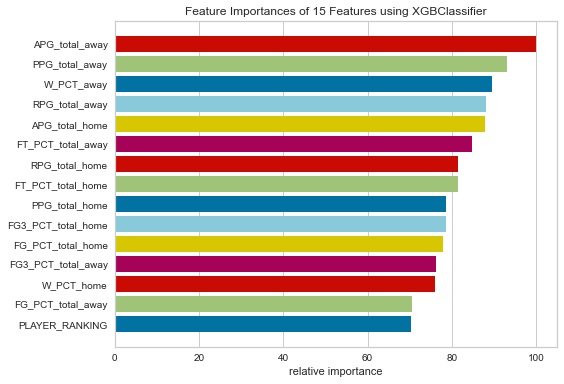

---------------------------------------------


In [32]:
print_all_metrics_and_plot(
    xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
    X_train_dict,
    X_test_dict,
    {
            'reg_lambda': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
    },
)

## Try prune gamma

WINNER:

Best XGBoost accuracy ({'gamma': 1}): 0.73
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       842
           1       0.68      0.51      0.58       506

    accuracy                           0.73      1348
   macro avg       0.71      0.68      0.69      1348
weighted avg       0.72      0.73      0.72      1348



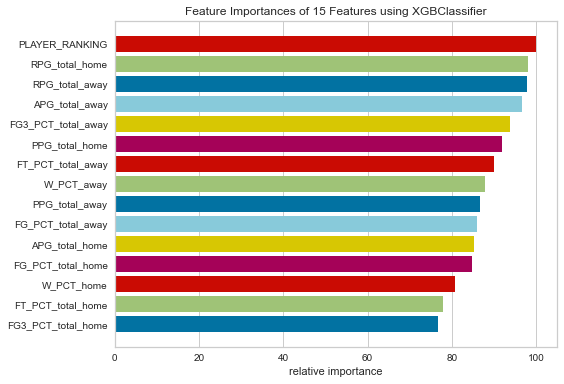

---------------------------------------------
FGP:

Best XGBoost accuracy ({'gamma': 355}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       591
           1       0.00      0.00      0.00       395

    accuracy                           0.60       986
   macro avg       0.30      0.50      0.37       986
weighted avg       0.36      0.60      0.45       986



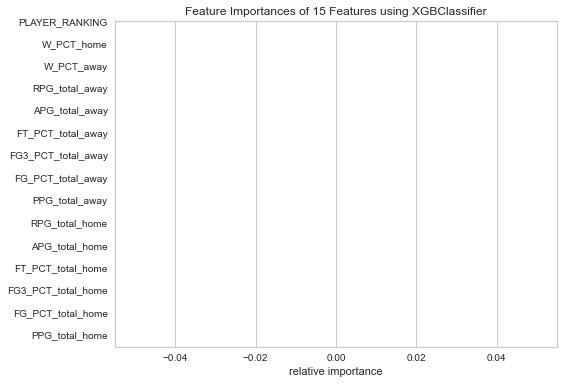

---------------------------------------------
FG3:

Best XGBoost accuracy ({'gamma': 59}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       349
           1       0.00      0.00      0.00       280

    accuracy                           0.55       629
   macro avg       0.28      0.50      0.36       629
weighted avg       0.31      0.55      0.40       629



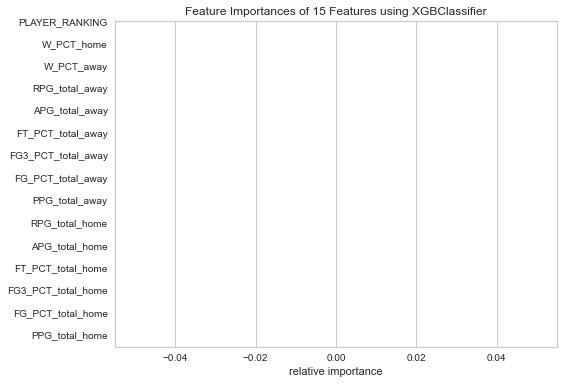

---------------------------------------------
FT:

Best XGBoost accuracy ({'gamma': 457}): 0.47
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.47      1.00      0.64       295

    accuracy                           0.47       629
   macro avg       0.23      0.50      0.32       629
weighted avg       0.22      0.47      0.30       629



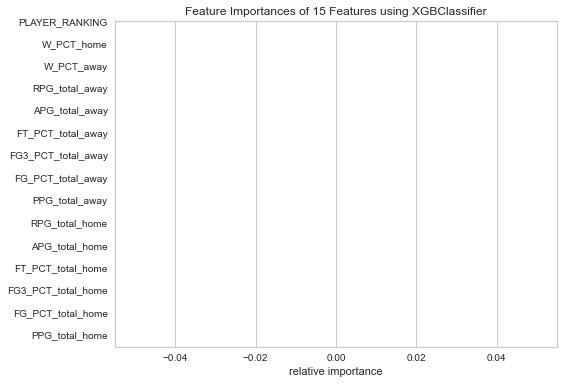

---------------------------------------------
AST:

Best XGBoost accuracy ({'gamma': 108}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       582
           1       0.00      0.00      0.00       398

    accuracy                           0.59       980
   macro avg       0.30      0.50      0.37       980
weighted avg       0.35      0.59      0.44       980



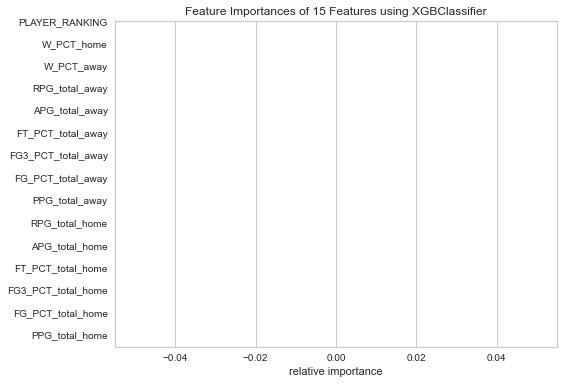

---------------------------------------------
REB:

Best XGBoost accuracy ({'gamma': 5}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       486
           1       0.56      0.43      0.49       352

    accuracy                           0.62       838
   macro avg       0.61      0.59      0.59       838
weighted avg       0.61      0.62      0.61       838



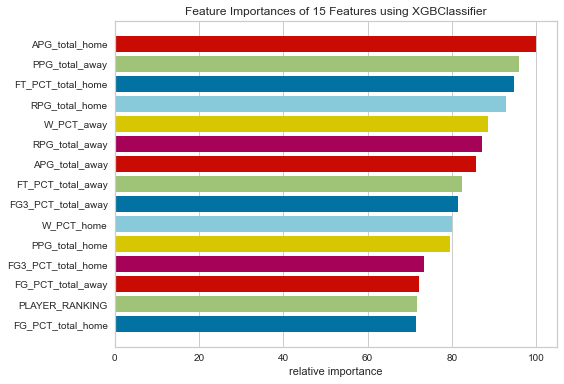

---------------------------------------------


In [31]:
print_all_metrics_and_plot(
    xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
    X_train_dict,
    X_test_dict,
    {
            'gamma' : [*range(0,500)],
    },
)

## Try prune scale_pos_weight

WINNER:

Best XGBoost accuracy ({'scale_pos_weight': 47}): 0.60
              precision    recall  f1-score   support

           0       0.85      0.43      0.57       842
           1       0.48      0.87      0.62       506

    accuracy                           0.60      1348
   macro avg       0.66      0.65      0.60      1348
weighted avg       0.71      0.60      0.59      1348



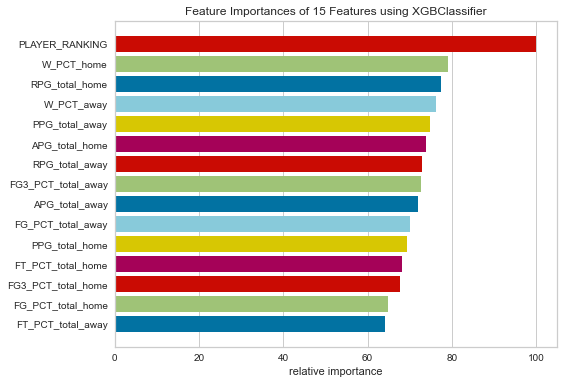

---------------------------------------------
FGP:

Best XGBoost accuracy ({'scale_pos_weight': 5}): 0.67
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       591
           1       0.56      0.72      0.63       395

    accuracy                           0.67       986
   macro avg       0.67      0.68      0.66       986
weighted avg       0.69      0.67      0.67       986



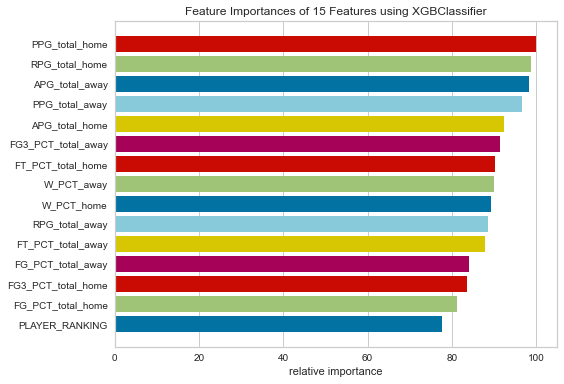

---------------------------------------------
FG3:

Best XGBoost accuracy ({'scale_pos_weight': 3}): 0.64
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       349
           1       0.57      0.76      0.65       280

    accuracy                           0.64       629
   macro avg       0.65      0.65      0.64       629
weighted avg       0.66      0.64      0.64       629



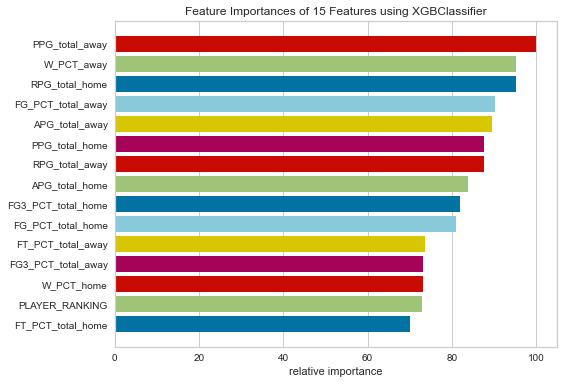

---------------------------------------------
FT:

Best XGBoost accuracy ({'scale_pos_weight': 107}): 0.55
              precision    recall  f1-score   support

           0       0.72      0.26      0.38       334
           1       0.51      0.89      0.65       295

    accuracy                           0.55       629
   macro avg       0.62      0.57      0.52       629
weighted avg       0.63      0.55      0.51       629



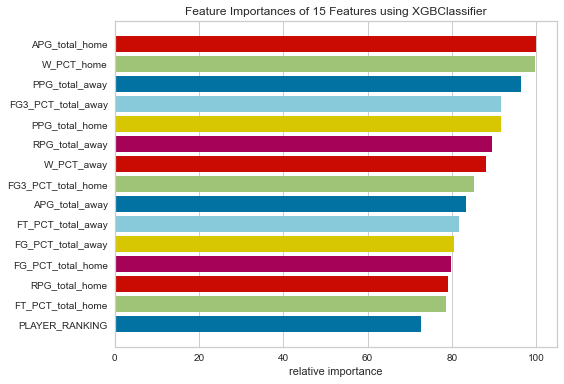

---------------------------------------------
AST:

Best XGBoost accuracy ({'scale_pos_weight': 38}): 0.54
              precision    recall  f1-score   support

           0       0.73      0.35      0.47       582
           1       0.46      0.81      0.59       398

    accuracy                           0.54       980
   macro avg       0.60      0.58      0.53       980
weighted avg       0.62      0.54      0.52       980



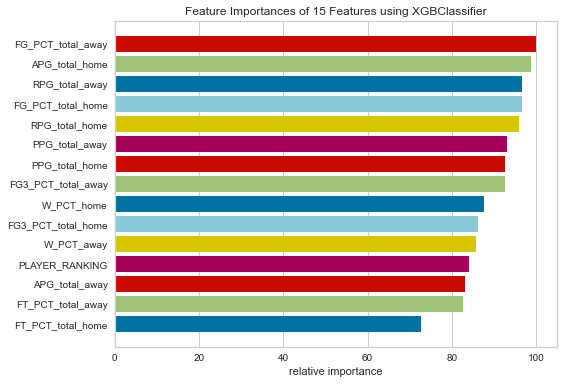

---------------------------------------------
REB:

Best XGBoost accuracy ({'scale_pos_weight': 18}): 0.56
              precision    recall  f1-score   support

           0       0.71      0.40      0.51       486
           1       0.48      0.78      0.60       352

    accuracy                           0.56       838
   macro avg       0.60      0.59      0.55       838
weighted avg       0.62      0.56      0.55       838



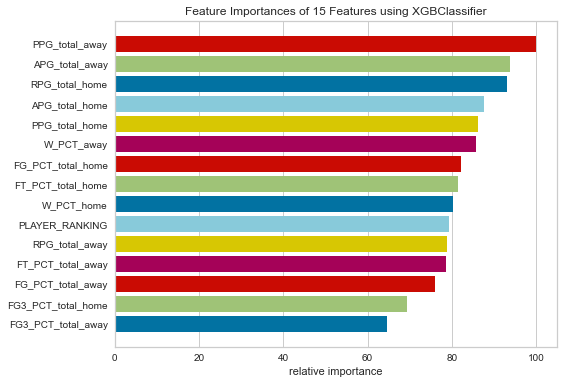

---------------------------------------------


In [32]:
print_all_metrics_and_plot(
    xgb.XGBClassifier(random_state=0,eval_metric='logloss'),
    X_train_dict,
    X_test_dict,
    {
            'scale_pos_weight' : [*range(0,500)],
    },
)